In [60]:
%run model.ipynb
%run data.ipynb

In [61]:
import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
import time
import matplotlib.pyplot as plt

In [62]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [63]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.1 ,random_state=1)
len(y_train), len(y_valid)

(723471, 80386)

In [64]:
train_data_tensor = torch.tensor(X_train.values.astype('float32')).float()
train_label_tensor = torch.tensor(y_train).float()
valid_data_tensor = torch.tensor(X_valid.values.astype('float32')).float()
valid_label_tensor = torch.tensor(y_valid).float()

In [65]:
batch_size = 32
train_tensor = torch.utils.data.TensorDataset(train_data_tensor, train_label_tensor)
valid_tensor = torch.utils.data.TensorDataset(valid_data_tensor, valid_label_tensor)
train_loader = torch.utils.data.DataLoader(dataset = train_tensor, batch_size = batch_size, shuffle = True, pin_memory= True , num_workers=8)
valid_loader = torch.utils.data.DataLoader(dataset = valid_tensor, batch_size = batch_size, shuffle = True, pin_memory= True, num_workers= 8)

In [66]:
model = model(train_data_tensor.shape[1])
model = model.to(device)
summary(model, (batch_size, train_data_tensor.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 32, 32]             416
              ReLU-2               [-1, 32, 32]               0
            Linear-3               [-1, 32, 16]             528
              ReLU-4               [-1, 32, 16]               0
            Linear-5                [-1, 32, 1]              17
Total params: 961
Trainable params: 961
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 0.00
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


In [67]:
loss = RMSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 0.001)
Epoch = 10

In [68]:
train_loss_list = []
val_loss_list = []
for epoch in range(Epoch):
    since = time.time()
    total_train_loss = 0
    loss_val = 0
    for data, label in train_loader:
        data = data.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss_val = loss(out, label)
        total_train_loss += loss_val
        loss_val.backward()
        optimizer.step()
    for data, label in valid_loader:
        data = data.to(device)
        label = label.to(device)
        out = model(data)
        loss_val += loss(out,label)
    train_loss_list.append(total_train_loss.item() / len(train_loader))
    val_loss_list.append(loss_val.item() / len(valid_loader))
    now_time = time.time() - since
    print("epoch = ", epoch + 1, " train loss = ", train_loss_list[-1],
    " validation loss = ", val_loss_list[-1])
    print("Training time is:{:.0f}m {:.0f}s".format(now_time // 60, now_time % 60))

epoch =  1  train loss =  9.091939327259055  validation loss =  8.908729295165141
Training time is:0m 36s
epoch =  2  train loss =  8.926134227520015  validation loss =  8.894001971000796
Training time is:0m 40s
epoch =  3  train loss =  8.918641359635544  validation loss =  8.903891949363311
Training time is:0m 44s
epoch =  4  train loss =  8.915787822327392  validation loss =  8.898507448766415
Training time is:0m 46s
epoch =  5  train loss =  8.911396595382369  validation loss =  8.887805287504975
Training time is:0m 47s
epoch =  6  train loss =  8.908818805564156  validation loss =  8.895588253581376
Training time is:0m 54s
epoch =  7  train loss =  8.906831212127914  validation loss =  8.919405808545562
Training time is:0m 48s
epoch =  8  train loss =  8.906309434296077  validation loss =  8.930540097741742
Training time is:0m 46s
epoch =  9  train loss =  8.90503090583396  validation loss =  8.915301370374054
Training time is:0m 46s
epoch =  10  train loss =  8.903309384537131  v

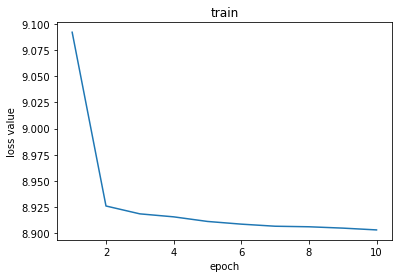

In [69]:
plt.plot(range(1, Epoch + 1), train_loss_list)
plt.title("train")
plt.ylabel("loss value")
plt.xlabel("epoch")
plt.show()

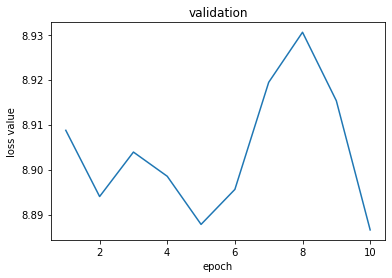

In [70]:
plt.plot(range(1, Epoch + 1), val_loss_list)
plt.title("validation")
plt.ylabel("loss value")
plt.xlabel("epoch")
plt.show()